In [220]:
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy.linalg as la
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [277]:
#Define constants
T=1
M=100
N=1000

#a func, a+ and a-
def simple_a(x, t=0):
    return np.array((x-1/3)*(x-2/3))

def simple_a2(x, t=0):
    return np.array((x-1/2)*(x-1/2))

def simple_a3(x, t=0):
    if np.isscalar(t):
        return (x-1/2)*(x-1/2)*t
    else:
        return t*(x-1/2)*(x-1/2)
    #return  #np.array(like_t*(x-1/2)*(x-1/2))

def pos_a(x, a):
    a_vec=a(x)
    null_vec=np.zeros(len(x))
    arr=np.maximum(null_vec, a_vec)
    return arr

def neg_a(x, a):
    null_vec=np.zeros(len(x))
    a_vec=-a(x)
    arr=np.maximum(null_vec, a_vec)
    return arr

#Matrix creator
def tridiag(lower, diag, upper):
    return np.diag(lower, -1) + np.diag(diag) + np.diag(upper, 1)    

#Plot func
def plot_solutionTest(U1, U2=np.zeros((1,1)), U3=np.zeros((1,1)), angle=-30, filename="pdfName", name="Analytic function"):
    x_len = len(U1[:, ])
    t_len = len(U1[0])
    x=np.linspace(0, 1, x_len) 
    t=np.linspace(0, T, t_len)
    fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(13, 5), subplot_kw={"projection": "3d"})
    fig.suptitle(name, fontsize=14)
    tt, xx = np.meshgrid(t, x)
    ax[0].plot_surface(tt, xx, U1, cmap=cm.coolwarm)
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('x')
    ax[0].set_zlabel('u')
    ax[0].set_title(r'Numerical solution')
    ax[0].view_init(azim=angle)        # Rotate the figure
    if np.shape(U2)==np.shape(U1):
        ax[1].plot_surface(tt, xx, U2, cmap=cm.coolwarm)
        ax[1].set_xlabel('t')
        ax[1].set_ylabel('x')
        ax[1].set_zlabel('u')
        ax[1].set_title(r'Exact solution')
        ax[1].view_init(azim=angle)
    if np.shape(U3)==np.shape(U1):
        ax[2].plot_surface(tt, xx, U3, cmap=cm.coolwarm)
        ax[2].set_xlabel('t')
        ax[2].set_ylabel('x')
        ax[2].set_zlabel('u')
        ax[2].set_title(r'$u_{analytic} - u_{numerical}$')
        ax[2].view_init(azim=angle)              
    fig.savefig(filename)
    fig.tight_layout()
    

In [278]:
#Test zone ifølge Unneberg
def init_noRHS1(x):
    return np.exp(-x)*np.sin(2*np.pi*x)#np.exp(-(x**2))*np.sin(2*np.pi*x)np.exp(-(x))*np.cos(2*np.pi*x)

def init_noRHS2(x):
    return np.cos(2*np.pi*x)

def init_noRHS3(x):
    return np.exp(-x**2)*np.sin(2*np.pi*(x-simple_a(x)))
                               

#Boundary x=0
def bc_noRHS1(t, init, a):
    return init(-a(0)*t) #init_test(simple_a(np.zeros(N+1))*t)    #WHAT?????????? Nå er den bare analytisk, samme som test3

In [279]:
#t=0 without a RHS, u_0(x)
def exact_sol(f, x, a, t):
    tt, xx=np.meshgrid(t, x)
    return f(xx-a(xx, tt)*tt)

#Scheme  , RHS_func=lambda t, x:np.zeros((len(x), len(t)))
def upwind(M, T, N, u_init, u_bc, a=simple_a):
    
    h=1/M
    k=T/N
    
    t=np.linspace(0, T, N+1)
    x=np.linspace(0, 1, M+1)
    
    U=np.zeros((M+1, N+1))

    U[:, 0]=u_init(x)
    
    lower=(k/h)*pos_a(x, a)[1:]
    middle=np.ones(len(x))-(k/h)*pos_a(x, a)[:]-(k/h)*neg_a(x, a)[:]
    upper=(k/h)*neg_a(x, a)[:-1]
    
    A=tridiag(lower, middle, upper)

    CFL=k/h*a(x)    
    
    for n in range(N):

        U[:, n+1]=A@U[:, n] 
        U[0, n+1]=u_bc(t[n+1], u_init, a) 
    

    return U, CFL

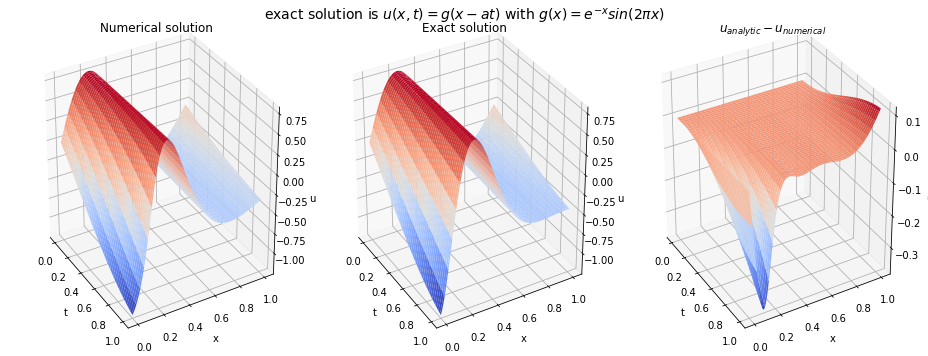

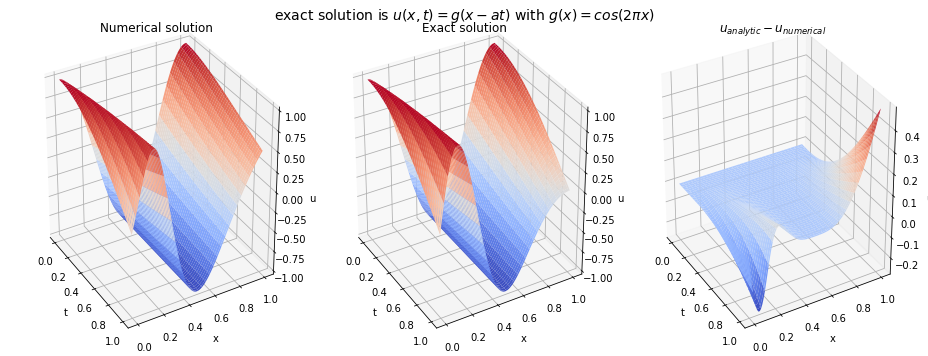

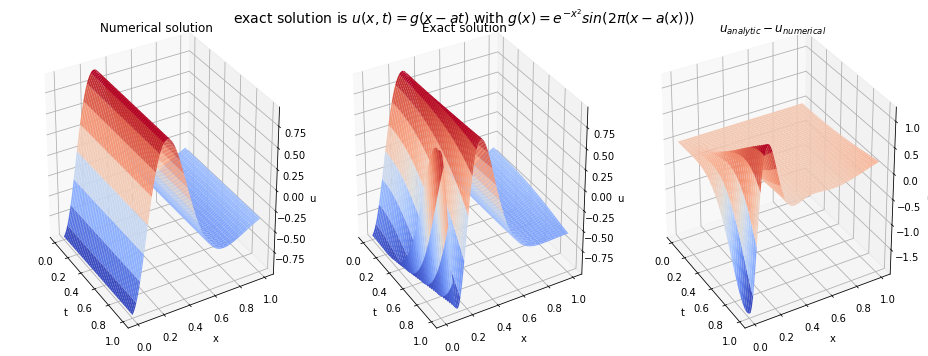

In [280]:
#Numerical solution
noRHS1, noRHSCFL1=upwind(M, T, N, init_noRHS1, bc_noRHS1)

#Exact solution
exact1=exact_sol(init_noRHS1, xxx, simple_a, ttt)

#Error
diff1=noRHS1-exact1

#Numerical solution 2
noRHS2, noRHSCFL2=upwind(M, T, N, init_noRHS2, bc_noRHS1, a=simple_a2)

#Exact solution 2
exact2=exact_sol(init_noRHS2, xxx, simple_a2, ttt)

#Error 2
diff2=noRHS2-exact2

#Numerical solution 3
noRHS3, noRHSCFL3=upwind(M, T, N, init_noRHS3, bc_noRHS1, a=simple_a3)

#Exact solution 3
exact3=exact_sol(init_noRHS3, xxx, simple_a3, ttt)

#Error 3
diff3=noRHS3-exact3

'''
#Numerical solution 2
noRHS2, noRHSCFL2=upwind(M, T, N, init_noRHS2, bc_noRHS1, a=simple_a)

#Exact solution 2
exact2=exact_sol(init_noRHS2, xxx, simple_a, ttt)

#Error 2
diff2=noRHS2-exact2

#Numerical solution 3
noRHS3, noRHSCFL3=upwind(M, T, N, init_noRHS3, bc_noRHS1, a=simple_a)

#Exact solution 3
exact3=exact_sol(init_noRHS3, xxx, simple_a, ttt)

#Error 3
diff3=noRHS3-exact3
'''

plot_solutionTest(noRHS1, exact1, diff1, angle=-30, filename="numeric upwind vs exact test 1", name=r'exact solution is $u(x,t)=g(x-at)$ with $g(x)=e^{-x}sin(2\pi x)$')

plot_solutionTest(noRHS2, exact2, diff2, angle=-30, filename="numeric upwind vs exact test 2", name=r'exact solution is $u(x,t)=g(x-at)$ with $g(x)=cos(2\pi x)$')

plot_solutionTest(noRHS3, exact3, diff3, angle=-30, filename="numeric upwind vs exact test 3", name=r'exact solution is $u(x,t)=g(x-at)$ with $g(x)=e^{-x^2}sin(2\pi\left(x-a(x))\right)$')

#På siste skjer det noe rart, vet ikke hva. Skal spørre imorgen, prøver å implementere en simple_a som avhenger av t
#OBS på LAX Wendroff kan ikke simple_a avhenge av t, så ikke vits i å prøve der

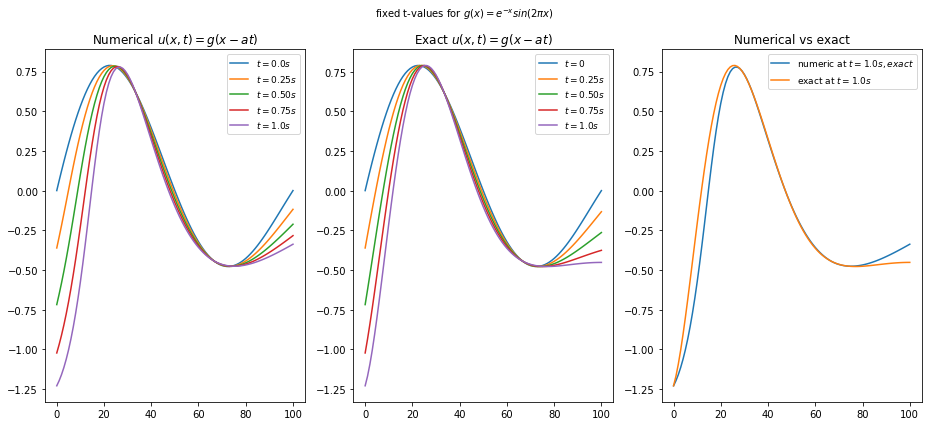

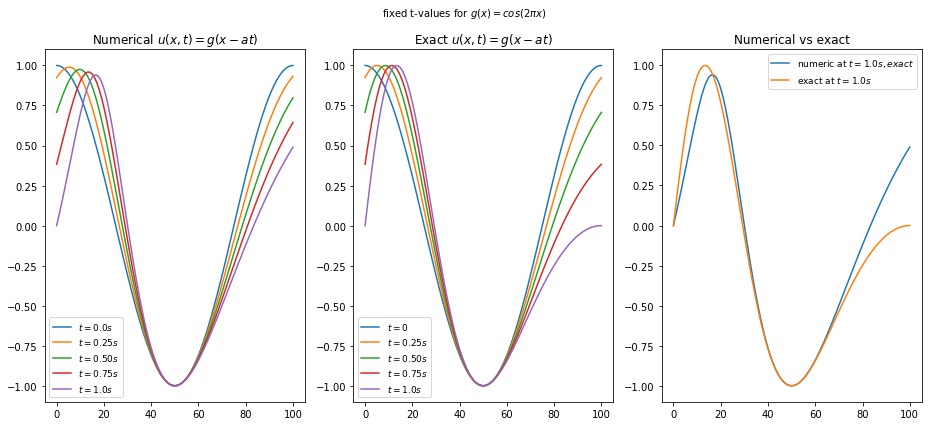

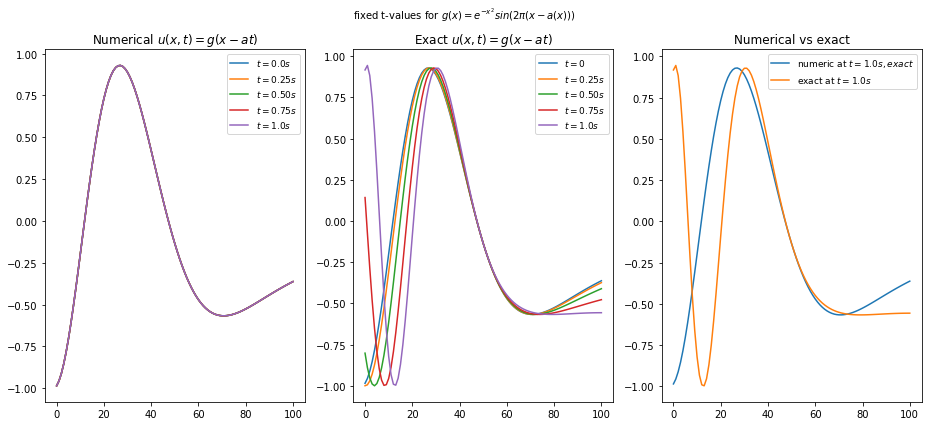

In [281]:
def plot_func2(numeric, exact, title="Title", savefig="fixed t-values1"):
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(13, 6))
    fig.suptitle(title, fontsize=10)
    
    ax1.plot(numeric[:, 0], label=r'$t=0.0s$')
    ax2.plot(exact[:, 0], label=r'$t=0$')
    #ax3.plot(numeric[:, 0], label=r'numeric at $t=0.0s$')
    #ax3.plot(exact[:, 0], label=r'exact at $t=0.0s$')
    
    ax1.plot(numeric[:, int(N*1/4)], label=r'$t=0.25s$')
    ax2.plot(exact[:, int(N*1/4)], label=r'$t=0.25s$')
    #ax3.plot(numeric[:, int(N*1/4)], label=r'$t=0.25s$')
    #ax3.plot(exact[:, int(N*1/4)], label=r'$t=0.25s$')
    
    ax1.plot(numeric[:, int(N*1/2)], label=r'$t=0.50s$')
    ax2.plot(exact[:, int(N*1/2)], label=r'$t=0.50s$')
    #ax3.plot(numeric[:, int(N*1/2)], label=r'numeric at $t=0.50s$')
    #ax3.plot(exact[:, int(N*1/2)], label=r'exact at $t=0.50s$')
    
    ax1.plot(numeric[:, int(N*3/4)], label=r'$t=0.75s$')
    ax2.plot(exact[:, int(N*3/4)], label=r'$t=0.75s$')
    #ax3.plot(numeric[:, int(N*3/4)], label=r'$t=0.75s$')
    #ax3.plot(exact[:, int(N*3/4)], label=r'$t=0.75s$')
    
    ax1.plot(numeric[:, -1], label=r'$t=1.0s$')
    ax2.plot(exact[:, -1], label=r'$t=1.0s$')
    ax3.plot(numeric[:, -1], label=r'numeric at $t=1.0s, exact$')
    ax3.plot(exact[:, -1], label=r'exact at $t=1.0s$')
    
    ax1.set_title(r'Numerical $u(x, t)=g(x-at)$')
    ax2.set_title(r'Exact $u(x, t)=g(x-at)$')
    ax3.set_title(r'Numerical vs exact')
    ax1.legend(prop={'size': 9})
    ax2.legend(prop={'size': 9})
    ax3.legend(prop={'size': 9})
    fig.savefig(savefig)
    fig.tight_layout()
    fig.subplots_adjust(top=0.88)
    
plot_func2(noRHS1, exact1, title=r'fixed t-values for $g(x)=e^{-x}sin(2\pi x)$', savefig="fixed t-values1") 
plot_func2(noRHS2, exact2, title=r'fixed t-values for $g(x)=cos(2\pi x)$', savefig="fixed t-values2")
plot_func2(noRHS3, exact3, title=r'fixed t-values for $g(x)=e^{-x^2}sin(2\pi\left(x-a(x))\right)$', savefig="fixed t-values3")

In [284]:
#Define an error function for a given method
def error_func_h(u_exact_method):
    Ms=np.arange(100, 1100, 100)
    hs=1/Ms
    t=np.linspace(0, T, N+1)
    error= np.zeros(len(hs))
    for i in range(len(Ms)):
        u_numeric, temp1 = upwind(Ms[i], T, N, init_noRHS, bc_noRHS1)
        x = np.linspace(0, 1, Ms[i]+1)
        u_exact = exact(init_noRHS, x, simple_a, t)
        error[i] = np.max( np.abs(u_numeric[-1,:] - u_exact[-1,:] ))
    order = np.polyfit(np.log(hs),np.log(error),1)[0]
    return hs, error , order

hs, error, order = error_func_h(v_exact_func2)

print(hs, order)

[0.01       0.005      0.00333333 0.0025     0.002      0.00166667
 0.00142857 0.00125    0.00111111 0.001     ] 0.00827007228080761


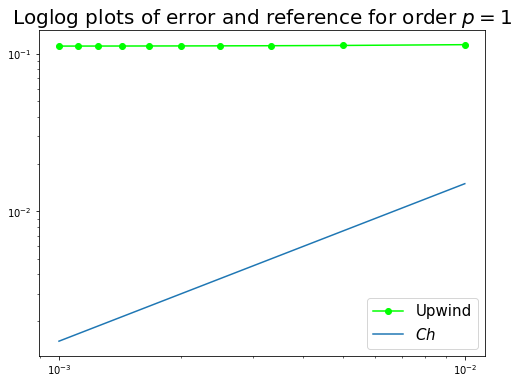

In [234]:
plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=1$', fontsize=20)
plt.loglog(hs, error,'o-', linestyle='-', color="lime", label="Upwind")
plt.loglog(hs, 1.5*hs, label=r'$Ch$')
plt.legend(fontsize=15)
plt.show()

In [92]:
def error_func_k(u_exact_func):
    Ns=np.arange(10, 1000, 100)
    ks=1/Ns
    x=np.linspace(0, 1, M+1)
    error=np.zeros(len(ks))
    for i in range(len(Ns)):
        u_numeric, temp1= upwind(M, T, Ns[i], init_noRHS, bc_noRHS1)
        t=np.linspace(0, T, Ns[i]+1)
        #tt, xx = np.meshgrid(t,x)
        u_exact = exact(init_noRHS, x, simple_a, t)
        error[i] = np.max(np.abs(u_numeric[:, -1] - u_exact[:, -1]))
    order=np.polyfit(np.log(ks), np.log(error), 1)[0]
    return ks, error, order, Ns
        
ks, error_k, order_k, NNNN = error_func_k(v_exact_func2)

print(order_k)

1.2454304295916798


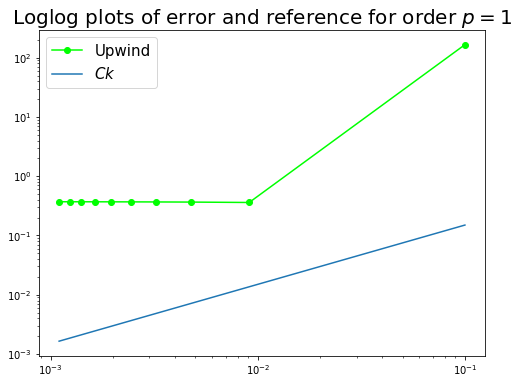

In [93]:
#HVORFOR BLIR DETTE SÅ STYGT NÅR ORDEN ER GOOD?
plt.figure(figsize=(8,6))
plt.title(r'Loglog plots of error and reference for order $p=1$', fontsize=20)
plt.loglog(ks, error_k,'o-', linestyle='-', color="lime", label="Upwind")
plt.loglog(ks, 1.5*ks, label=r'$Ck$')
plt.legend(fontsize=15)
plt.show()